In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Importing necessary libaries

In [2]:
df = pd.read_csv("mi_data.csv")
df.head()

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po


In [3]:
df.drop(columns='imgURL', inplace=True)
#Dropping unimportant column

In [4]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '')
df['price']
#Removing the currency symbol

0      13500
1      12840
2       7520
3       8450
4      21644
       ...  
543    26999
544     8999
545    11990
546    24999
547    12500
Name: price, Length: 548, dtype: object

In [5]:
df['price'] = df['price'].astype('int')
#Assiging data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_names   548 non-null    object 
 1   ratings       548 non-null    float64
 2   price         548 non-null    int32  
 3   storage_ram   548 non-null    object 
 4   os_processor  548 non-null    object 
 5   network       548 non-null    object 
 6   battery       548 non-null    object 
dtypes: float64(1), int32(1), object(5)
memory usage: 28.0+ KB


In [7]:
df['storage_ram']

0      Internal Storage128 GBRAM8 GBMemory Card Slot ...
1      Internal Storage128 GBRAM8 GBMemory Card Slot ...
2      Internal Storage32 GBRAM2 GBMemory Card Slot T...
3      Internal Storage32 GBRAM3 GBMemory Card Slot T...
4      Internal Storage128 GBRAM6 GBExpandable Storag...
                             ...                        
543    Internal Storage32 GBRAM3 GBExpandable Storage...
544    Internal Storage32 GBRAM3 GBMemory Card Slot T...
545                        Internal Storage128 GBRAM6 GB
546    Internal Storage64 GBRAM4 GBExpandable Storage...
547    Internal Storage64 GBRAM4 GBExpandable Storage...
Name: storage_ram, Length: 548, dtype: object

In [8]:
df['storage_ram'] = df['storage_ram'].str.split('GBRAM').str[-1].str.strip()
#Keeping only the number of ram

In [9]:
df['storage_ram'] = df['storage_ram'].str[0:2]

In [10]:
df['storage_ram'].unique()

array(['8 ', '2 ', '3 ', '6 ', '4 ', '12', '1 ', 'In'], dtype=object)

In [11]:
df[df['storage_ram'] == 'In']

,model_names,ratings,price,storage_ram,os_processor,network,battery
297,Peace Mi4,3.8,849,In,Operating System1.77Primary Clock Speed1.77 MHz,Network Type2GSupported NetworksGSM,Battery Capacity2500 mAh
349,Peace Mi3 Pro,3.7,799,In,Operating System1.77Primary Clock Speed1.77 MHz,Network Type2GSupported NetworksGSM,Battery Capacity2500 mAh
406,Peace Mi2,4.5,849,In,Operating System1.77Primary Clock Speed1.77 MHz,Network Type2GSupported NetworksGSM,Battery Capacity2500 mAh
409,Peace Mi2,4.5,849,In,Operating System1.77Primary Clock Speed1.77 MHz,Network Type2GSupported NetworksGSM,Battery Capacity2500 mAh


In [12]:
filt = df[df['storage_ram'] == 'In']
drop = list(filt.index)
drop
#find out which indexes to drop

[297, 349, 406, 409]

In [13]:
df.drop(index=drop, inplace=True)

In [14]:
df['storage_ram'] = df['storage_ram'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544 entries, 0 to 547
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_names   544 non-null    object 
 1   ratings       544 non-null    float64
 2   price         544 non-null    int32  
 3   storage_ram   544 non-null    int32  
 4   os_processor  544 non-null    object 
 5   network       544 non-null    object 
 6   battery       544 non-null    object 
dtypes: float64(1), int32(2), object(4)
memory usage: 29.8+ KB


In [15]:
df['os_processor'].sample()
#Os processor conducts of unstructured data, we need to work out on them to extract meaningful columns while avoiding null values


522    Operating SystemAndroid Pie 9.0Processor TypeQ...
Name: os_processor, dtype: object

In [16]:
df['network']
#Lets work with network first and leave the hard part at the end 

0           Network Type4G VOLTESupported Networks4G LTE
1         Network Type4G VOLTESupported Networks4G VoLTE
2       Network Type4G VOLTE, 4GSupported Networks4G LTE
3      Network Type4G VOLTE, 4GSupported Networks4G V...
4      Network Type5G, 4G VOLTESupported Networks5G, ...
                             ...                        
543    Network Type3G, 4GSupported NetworksGSM, 4G LT...
544    Network Type4G VOLTESupported Networks4G LTEBl...
545    Network Type4G VOLTE, 5GSupported Networks4G V...
546    Network Type3G, 4G VOLTE, 4GSupported Networks...
547    Network Type3G, 4G, 2GSupported NetworksGSM, W...
Name: network, Length: 544, dtype: object

In [17]:
df['network'] = df['network'].str.split('Network Type').str[-1].str.strip()
#Extracting only the network type

In [18]:
df['network'] = df['network'].str[:2]

In [19]:
df['network']

0      4G
1      4G
2      4G
3      4G
4      5G
       ..
543    3G
544    4G
545    4G
546    3G
547    3G
Name: network, Length: 544, dtype: object

In [20]:
df['storage'] = df['model_names'].str[-7:]
#creating a new colummn from model_names

In [21]:
df['storage'].unique()

array(['128 GB)', ' 32 GB)', ' 64 GB)', '256 GB)', ', 8 GB)', ' 16 GB)',
       ', 6 GB)'], dtype=object)

In [22]:
df['storage'] = df['storage'].str[:3].str.replace(',','').astype('int')


In [23]:
df['storage']

0      128
1      128
2       32
3       32
4      128
      ... 
543    128
544     32
545     32
546    128
547     64
Name: storage, Length: 544, dtype: int32

In [24]:
df1 = df.copy() 

In [25]:
df1['os_processor'].head()

0    Operating SystemAndroid 13Processor CoreOcta C...
1    Operating SystemAndroid 13Processor CoreOcta C...
2    Operating SystemAndroid Q 10Processor CoreOcta...
3    Operating SystemAndroid Q 10Processor CoreOcta...
4    Operating SystemAndroid 11Processor TypeQualco...
Name: os_processor, dtype: object

In [26]:
samp = list(df1['os_processor'].sample(5))

In [27]:
samp

['Operating SystemAndroid Pie 9.0Processor TypeQualcomm Snapdragon 439Processor CoreOcta CorePrimary Clock Speed1.95 GHzSecondary Clock Speed1.45 GHzOperating FrequencyGSM: B2, B3, B5, B8, WCDMA: B1, B2, B5, B8, LTE TDD: B40, B41, LTE FDD: B1, B3, B5, B8',
 'Operating SystemAndroid Q 11Processor CoreOcta CorePrimary Clock Speed2.4 GHz',
 'Operating SystemAndroid Pie 9Processor TypeQualcomm Snapdragon 665Processor CoreOcta CorePrimary Clock Speed2 GHzSecondary Clock Speed2 GHzOperating FrequencyGSM : B2/B3/B5/B8, WCDMA : B1/B2/B5/B8, TDD-LTE: B40/B41 (2535 -2655MHz), FDD-LTE: B1/B3/B5/B8',
 'Operating SystemAndroid Q 11Processor TypeOcta CoreProcessor CoreOcta CorePrimary Clock Speed2.4 GHz',
 'Operating SystemAndroid Marshmallow 6.0.1Processor TypeQualcomm Snapdragon 625 64-bit Octa Core 2GHzProcessor CoreOcta CorePrimary Clock Speed2 GHzOperating FrequencyGSM - 850 / 900 / 1800 / 1900 MHz; WCDMA - 850 / 900 / 1900 / 2100 MHz; 4G LTE (TDD) - B40, LTE (FDD) - B3 / B5']

In [28]:
df1['cut_text'] = df1['os_processor'].str.split('GHzOperating').str[0].str.strip()
#extracting only : operating system, type, core, and clock speed

In [29]:
samp = list(df1['cut_text'])

In [30]:
samp[5]

'Operating SystemAndroid 11Processor CoreOcta CorePrimary Clock Speed2 GHz'

In [31]:
df1['cut_text'] = df1['cut_text'].str.split('GHzSecondary').str[0].str.strip()  

In [32]:
samp = list(df1['cut_text'])
samp[5]

'Operating SystemAndroid 11Processor CoreOcta CorePrimary Clock Speed2 GHz'

In [33]:
df['Operating System'] = df1['cut_text'].str.split('Processor').str[0].str.strip()
df['Operating System'] = df['Operating System'].str[16:]
df

,model_names,ratings,price,storage_ram,os_processor,network,battery,storage,Operating System
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,8,Operating SystemAndroid 13Processor CoreOcta C...,4G,Battery Capacity6000 mAh,128,Android 13
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,8,Operating SystemAndroid 13Processor CoreOcta C...,4G,Battery Capacity6000 mAh,128,Android 13
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,2,Operating SystemAndroid Q 10Processor CoreOcta...,4G,Battery Capacity5000 mAh,32,Android Q 10
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,3,Operating SystemAndroid Q 10Processor CoreOcta...,4G,Battery Capacity5000 mAh,32,Android Q 10
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,6,Operating SystemAndroid 11Processor TypeQualco...,5G,Battery Capacity4250 mAhBattery TypeLi-Po,128,Android 11
...,...,...,...,...,...,...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,3,Operating SystemAndroid Lollipop 5.1Processor ...,3G,Battery Capacity4050 mAhBattery TypeLi-Polymer,128,Android Lollipop 5.1
544,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,3,Operating SystemAndroid Pie 9Processor CoreOct...,4G,Battery Capacity4000 mAhBattery Typelithium-ion,32,Android Pie 9
545,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,6,Operating SystemAndroid Nougat 11Processor Cor...,4G,Battery Capacity4520 mAh,32,Android Nougat 11
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,4,Operating SystemAndroid Nougat 7.1.2Processor ...,3G,Battery Capacity4000 mAh,128,Android Nougat 7.1.2


In [34]:
df1['cut_text'] = df1['cut_text'].str.split('Processor Core').str[1].str.strip()
df1['cut_text']


0      Octa CorePrimary Clock Speed2.4 GHz
1      Octa CorePrimary Clock Speed2.4 GHz
2        Octa CorePrimary Clock Speed2 GHz
3        Octa CorePrimary Clock Speed2 GHz
4          Octa CorePrimary Clock Speed2.4
                      ...                 
543        Hexa CorePrimary Clock Speed1.8
544      Octa CorePrimary Clock Speed2 GHz
545    Octa CorePrimary Clock Speed3.2 GHz
546        Octa CorePrimary Clock Speed1.8
547        Octa CorePrimary Clock Speed1.4
Name: cut_text, Length: 544, dtype: object

In [35]:
df['Processor Core'] = df1['cut_text'].str.split('Primary').str[0].str.strip()
df['Processor Core']

0      Octa Core
1      Octa Core
2      Octa Core
3      Octa Core
4      Octa Core
         ...    
543    Hexa Core
544    Octa Core
545    Octa Core
546    Octa Core
547    Octa Core
Name: Processor Core, Length: 544, dtype: object

In [36]:
df1['cut_text'] = df1['cut_text'].str.split('Primary Clock Speed').str[1].str.strip()

In [37]:
df1['cut_text']

0      2.4 GHz
1      2.4 GHz
2        2 GHz
3        2 GHz
4          2.4
        ...   
543        1.8
544      2 GHz
545    3.2 GHz
546        1.8
547        1.4
Name: cut_text, Length: 544, dtype: object

In [38]:
df['Primary Clock Speed'] = df1['cut_text'].str[:3]
df['Primary Clock Speed']

0      2.4
1      2.4
2      2 G
3      2 G
4      2.4
      ... 
543    1.8
544    2 G
545    3.2
546    1.8
547    1.4
Name: Primary Clock Speed, Length: 544, dtype: object

In [39]:
df['Primary Clock Speed'] = df['Primary Clock Speed'].str.replace('G','')
df['Primary Clock Speed'] = df['Primary Clock Speed'].astype('float')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544 entries, 0 to 547
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model_names          544 non-null    object 
 1   ratings              544 non-null    float64
 2   price                544 non-null    int32  
 3   storage_ram          544 non-null    int32  
 4   os_processor         544 non-null    object 
 5   network              544 non-null    object 
 6   battery              544 non-null    object 
 7   storage              544 non-null    int32  
 8   Operating System     544 non-null    object 
 9   Processor Core       517 non-null    object 
 10  Primary Clock Speed  517 non-null    float64
dtypes: float64(2), int32(3), object(6)
memory usage: 44.6+ KB


In [41]:
df.drop(columns='os_processor', inplace=True)

In [42]:
df
#Lets modify battery's column

,model_names,ratings,price,storage_ram,network,battery,storage,Operating System,Processor Core,Primary Clock Speed
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,8,4G,Battery Capacity6000 mAh,128,Android 13,Octa Core,2.4
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,8,4G,Battery Capacity6000 mAh,128,Android 13,Octa Core,2.4
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,2,4G,Battery Capacity5000 mAh,32,Android Q 10,Octa Core,2.0
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,3,4G,Battery Capacity5000 mAh,32,Android Q 10,Octa Core,2.0
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,6,5G,Battery Capacity4250 mAhBattery TypeLi-Po,128,Android 11,Octa Core,2.4
...,...,...,...,...,...,...,...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,3,3G,Battery Capacity4050 mAhBattery TypeLi-Polymer,128,Android Lollipop 5.1,Hexa Core,1.8
544,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,3,4G,Battery Capacity4000 mAhBattery Typelithium-ion,32,Android Pie 9,Octa Core,2.0
545,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,6,4G,Battery Capacity4520 mAh,32,Android Nougat 11,Octa Core,3.2
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,4,3G,Battery Capacity4000 mAh,128,Android Nougat 7.1.2,Octa Core,1.8


In [43]:
df['battery'] = df['battery'].str.split('Battery Capacity').str[1].str.strip()
df.head()


,model_names,ratings,price,storage_ram,network,battery,storage,Operating System,Processor Core,Primary Clock Speed
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,8,4G,6000 mAh,128,Android 13,Octa Core,2.4
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,8,4G,6000 mAh,128,Android 13,Octa Core,2.4
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,2,4G,5000 mAh,32,Android Q 10,Octa Core,2.0
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,3,4G,5000 mAh,32,Android Q 10,Octa Core,2.0
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,6,5G,4250 mAhBattery TypeLi-Po,128,Android 11,Octa Core,2.4


In [44]:
df['battery'] = df['battery'].str[:4]

In [45]:
df['battery'].unique()

array(['6000', '5000', '4250', '3000', '4600', '4520', '4000', '5020',
       '5160', '3010', '4500', '3120', '3080', '4100', '4030', '3400',
       '5080', '4980', '2000', '4850', '5018', '3300', '4780', '4820',
       '3030', '3050', '2200', '4050'], dtype=object)

In [46]:
df.isnull().sum()


model_names             0
ratings                 0
price                   0
storage_ram             0
network                 0
battery                 0
storage                 0
Operating System        0
Processor Core         27
Primary Clock Speed    27
dtype: int64

In [47]:
df.dropna(inplace=True)

In [48]:
df['Operating System'].unique()

array(['Android 13', 'Android Q 10', 'Android 11', 'Android Oreo 8.1',
       'Android 12', 'Android Pie 9.0', 'Android Pie 9', 'Android 10',
       'Android Q 11', 'Android Nougat 7.1.2',
       'Android Marshmallow 6.0.1', 'Android Android 11',
       'Android Oreo 8.0', 'Android KitKat 4.4.4', 'Android Nougat 7.1.1',
       'Android 12 Go', 'Android MIUI 13, Android 12.0',
       'Android Q Android Q 12.5', 'Android Pie 10', 'Android',
       'Android Q MIUI 11', 'Android Q MIUI 13, Android 12.0',
       'Android Android 13', 'Android Android 12', 'Q 10',
       'Android Q Android 11', 'Android Jelly Bean 4.3',
       'Android Marshmallow 6', 'Android Android 10',
       'Android Nougat 7.1', 'Android Lollipop 5.0.2',
       'Android KitKat 4.4.2', 'Android Q 12',
       'Android MIUI 12, Android 11.0', 'Android MIUI 14, Android 13.0',
       'Android KitKat 4.4', 'Android Lollipop 5.1', 'Android Nougat 11'],
      dtype=object)

In [49]:
df['network'].unique()

array(['4G', '5G', '3G', '2G'], dtype=object)

In [50]:
df.head(20)
#Our hardwork paid off !

,model_names,ratings,price,storage_ram,network,battery,storage,Operating System,Processor Core,Primary Clock Speed
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,8,4G,6000,128,Android 13,Octa Core,2.4
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,8,4G,6000,128,Android 13,Octa Core,2.4
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,2,4G,5000,32,Android Q 10,Octa Core,2.0
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,3,4G,5000,32,Android Q 10,Octa Core,2.0
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,6,5G,4250,128,Android 11,Octa Core,2.4
5,"Redmi 10 Prime (Phantom Black, 64 GB)",4.2,11990,4,4G,6000,64,Android 11,Octa Core,2.0
6,"Mi 11 Lite (Jazz Blue, 128 GB)",4.2,17499,8,4G,4250,128,Android 11,Octa Core,2.3
7,"Mi 11 Lite (Vinyl Black, 128 GB)",4.2,17499,8,4G,4250,128,Android 11,Octa Core,2.3
8,"Redmi 9A Sport (Coral Green, 32 GB)",4.1,7290,2,4G,5000,32,Android Q 10,Octa Core,2.0
9,"Redmi 9 (Carbon Black, 64 GB)",4.2,10480,4,4G,5000,64,Android Q 10,Octa Core,2.3


In [51]:
#lets Viualize !

Text(0, 0.5, 'Values')

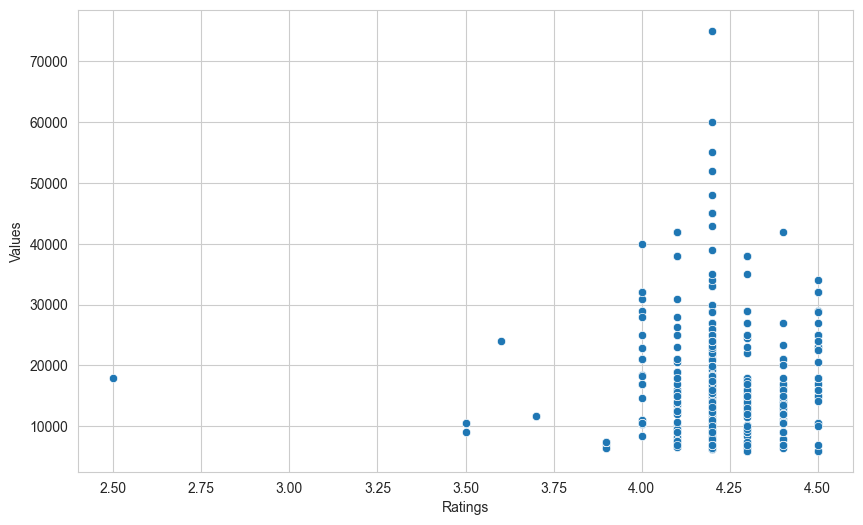

In [52]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='ratings',y='price')
plt.xlabel('Ratings')
plt.ylabel('Values')
#Prices doesnt have little to no correlation with ratings since low prices have great ratings

In [53]:
battery = df.sort_values(by='battery').groupby('battery')['price'].mean()
battery = battery.reset_index()

Text(0, 0.5, 'Values')

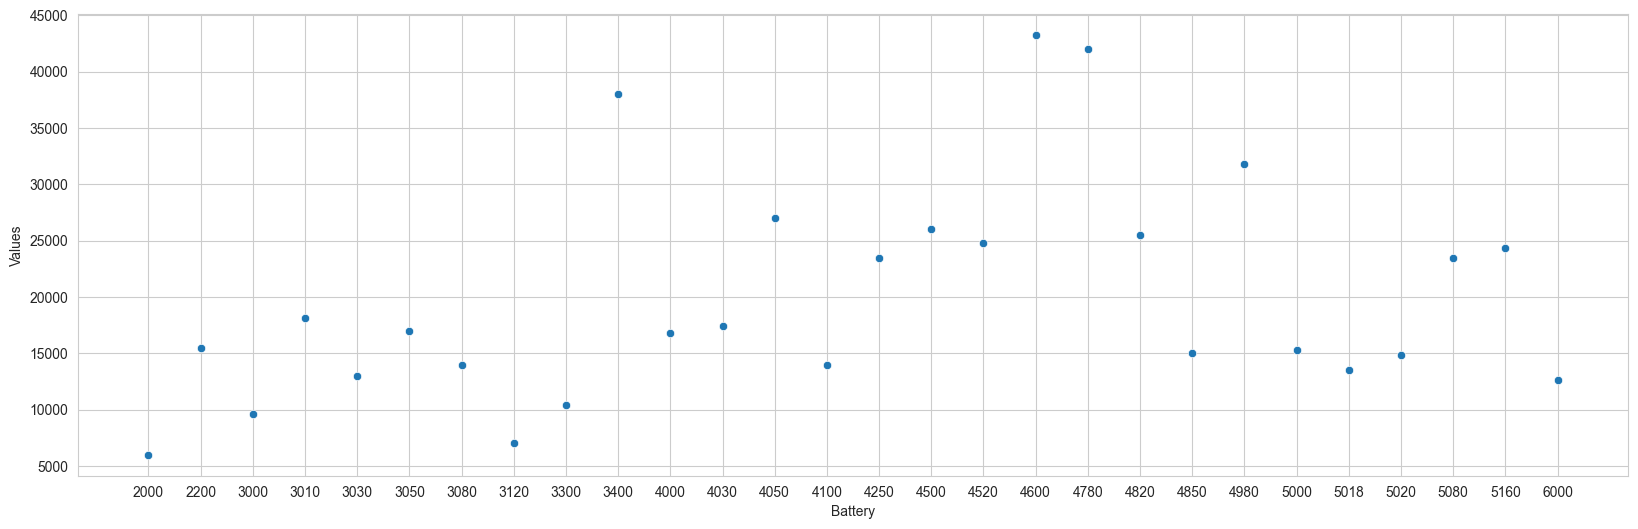

In [54]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=battery, x='battery',y='price')
sns.set_style('whitegrid')
plt.xlabel('Battery')
plt.ylabel('Values')
#The lower end batteries usually cost less than mid/higher end batteries

In [55]:
network = df.groupby('network')['price'].mean()
network = network.reset_index()

Text(0, 0.5, 'Values')

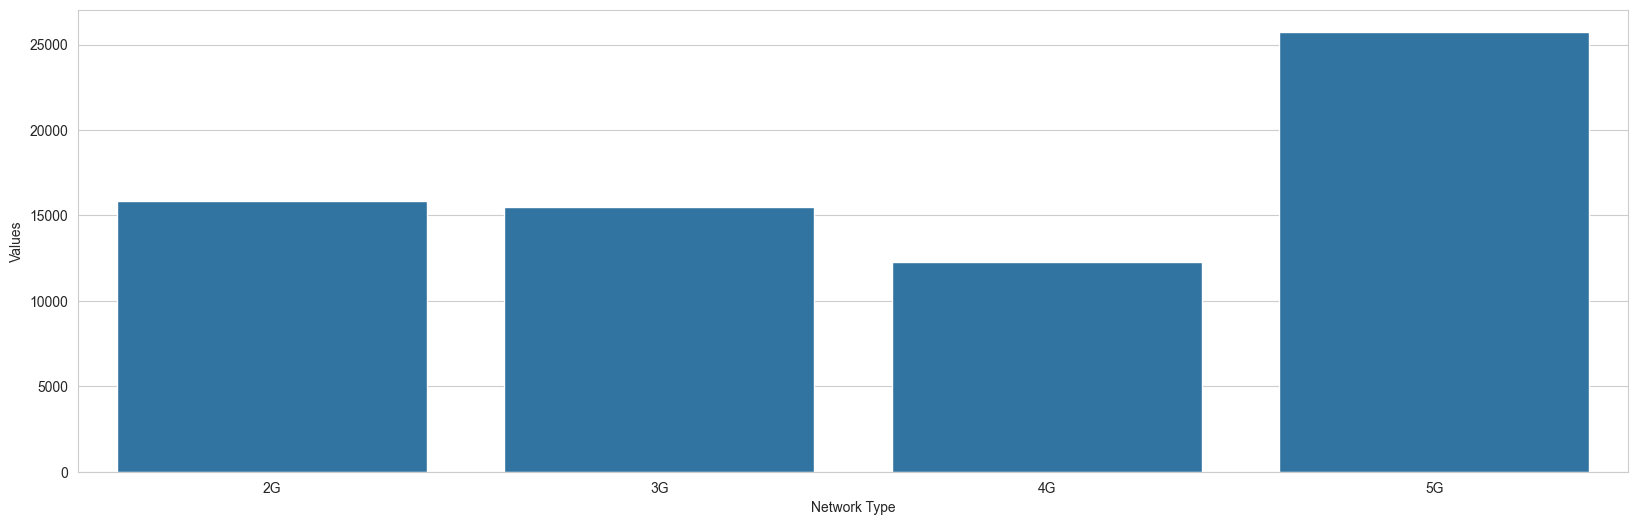

In [56]:
plt.figure(figsize=(20, 6))
sns.barplot(data=network, x='network',y='price')
sns.set_style('whitegrid')
plt.xlabel('Network Type')
plt.ylabel('Values')
#5G costs more than other networks

In [57]:
storage = df.groupby('storage')['price'].mean().reset_index()

Text(0, 0.5, 'Values')

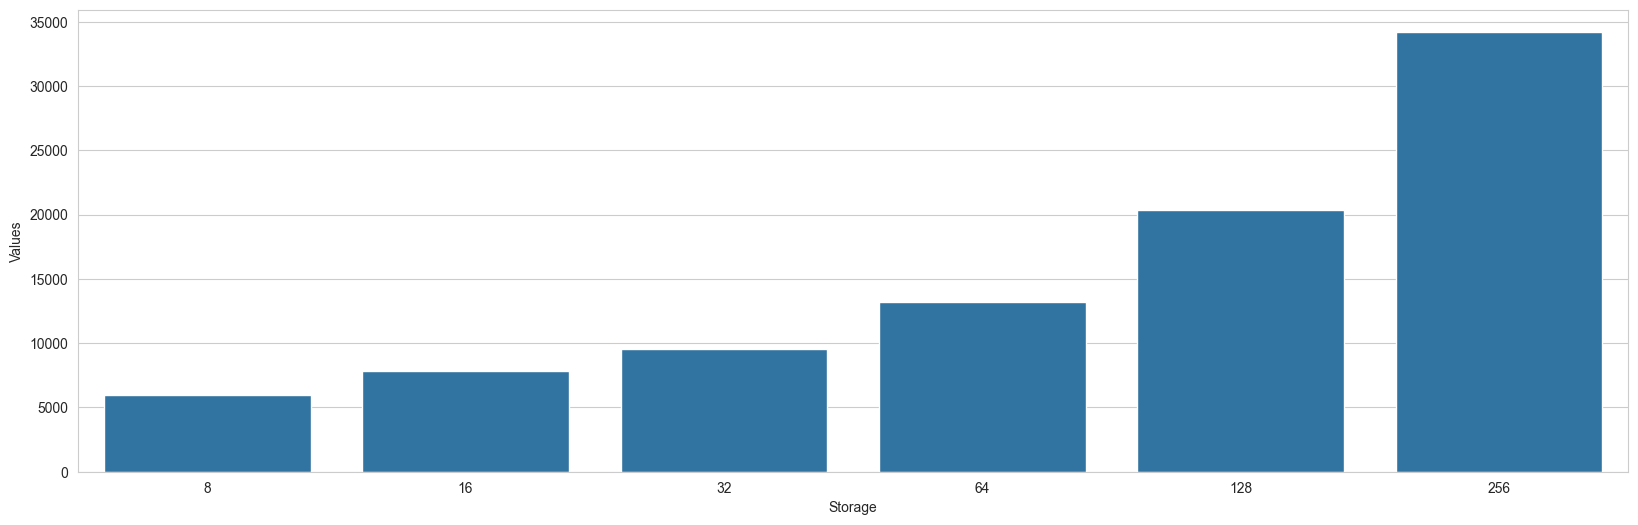

In [58]:
plt.figure(figsize=(20, 6))
sns.barplot(data=storage, x='storage',y='price')
sns.set_style('whitegrid')
plt.xlabel('Storage')
plt.ylabel('Values')
#Strong correlation between storage and price

In [59]:
ram = df.groupby('storage_ram')['price'].mean().reset_index()

Text(0, 0.5, 'Values')

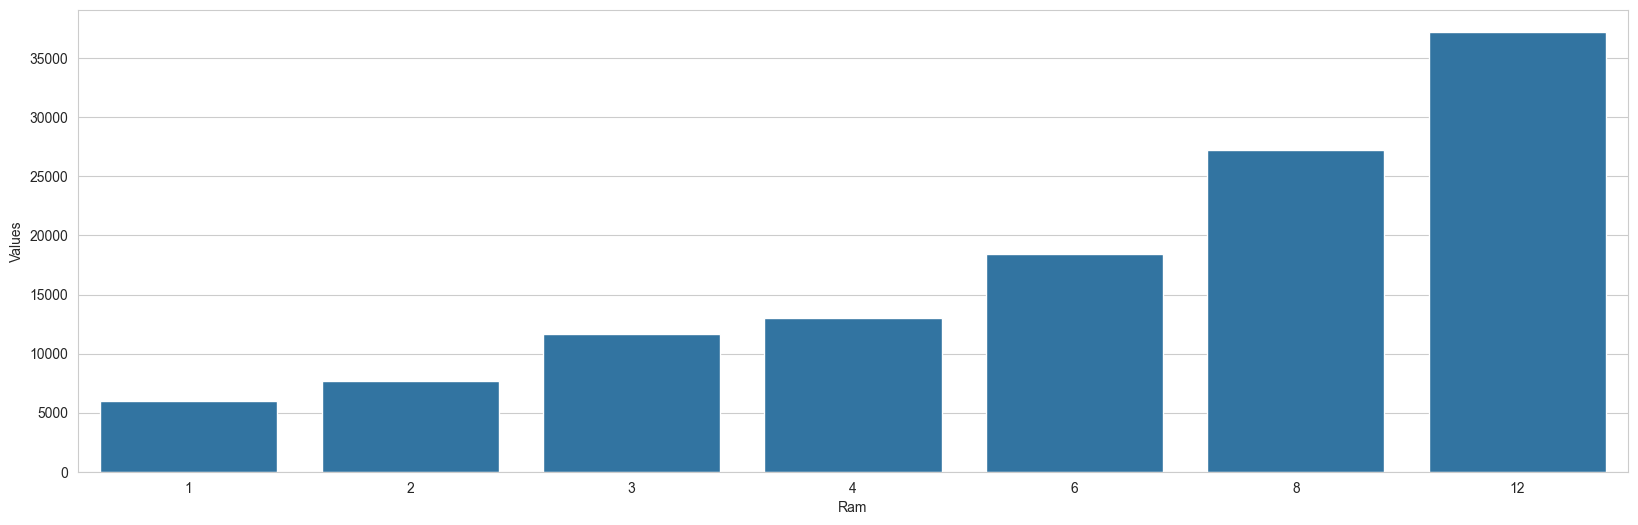

In [60]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ram, x='storage_ram',y='price')
sns.set_style('whitegrid')
plt.xlabel('Ram')
plt.ylabel('Values')
#Strong correlation between Ram and price

In [61]:
oper = df.groupby('Operating System')['price'].mean().reset_index()

In [62]:
plt.figure(figsize=(100, 150))
sns.barplot(data=oper, x='Operating System',y='price')
sns.set_style('whitegrid')
plt.xlabel('Operating System')
plt.ylabel('Values')
#Most expensive operation system is Andriod Nougat 7.1.1

Text(0, 0.5, 'Values')

In [63]:
core = df.groupby('Processor Core')['price'].mean().reset_index()

Text(0, 0.5, 'Values')

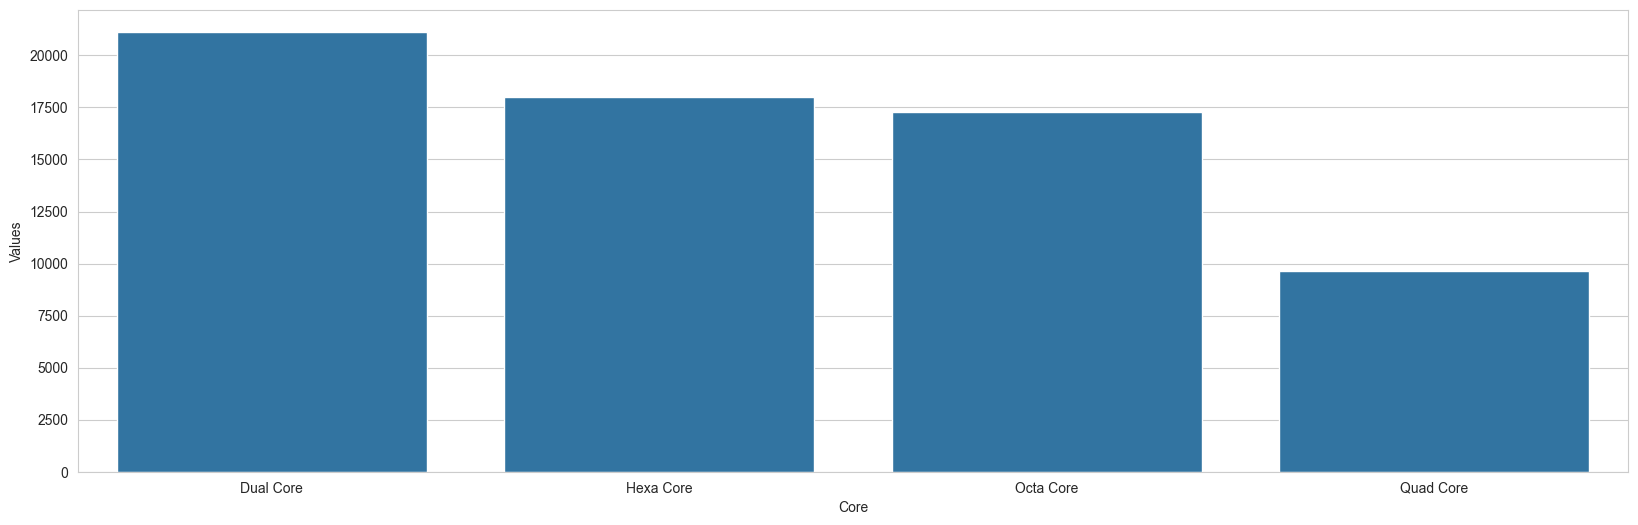

In [64]:
plt.figure(figsize=(20, 6))
sns.barplot(data=core, x='Processor Core',y='price')
sns.set_style('whitegrid')
plt.xlabel('Core')
plt.ylabel('Values')
#Strong correlation between core and prices

In [65]:
clock = df.sort_values(by='Primary Clock Speed').groupby('Primary Clock Speed')['price'].mean().reset_index()


Text(0, 0.5, 'Values')

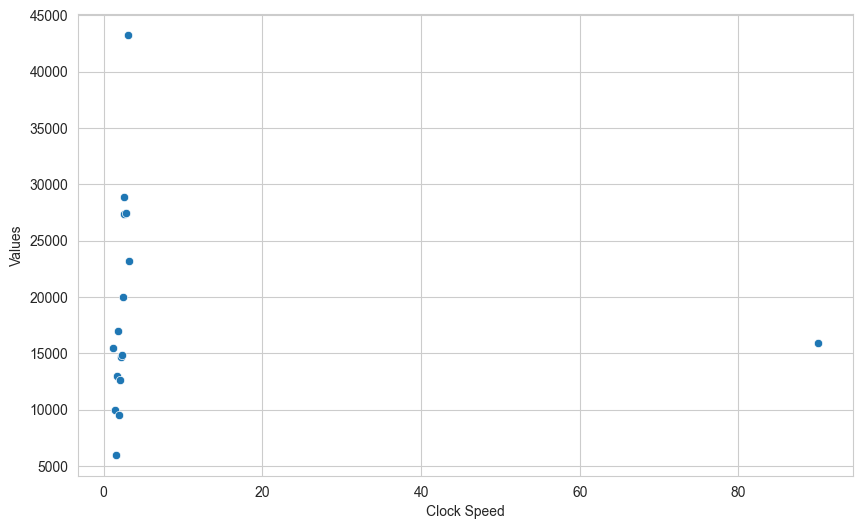

In [66]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.scatterplot(data=clock, x='Primary Clock Speed',y='price')
plt.xlabel('Clock Speed')
plt.ylabel('Values')
#There is an outlier which affects our scatterplot, lets fix it!

In [67]:
filt = df[df['Primary Clock Speed']== 90]
test = df.drop(index=filt.index)
test.max()

model_names            �9A (Midnight Black, 32 GB)
ratings                                        4.5
price                                        74990
storage_ram                                     12
network                                         5G
battery                                       6000
storage                                        256
Operating System                              Q 10
Processor Core                           Quad Core
Primary Clock Speed                            3.2
dtype: object

In [68]:
df.drop(index=filt.index, inplace=True)

In [69]:
clock = df.sort_values(by='Primary Clock Speed').groupby('Primary Clock Speed')['price'].mean().reset_index()

Text(0, 0.5, 'Values')

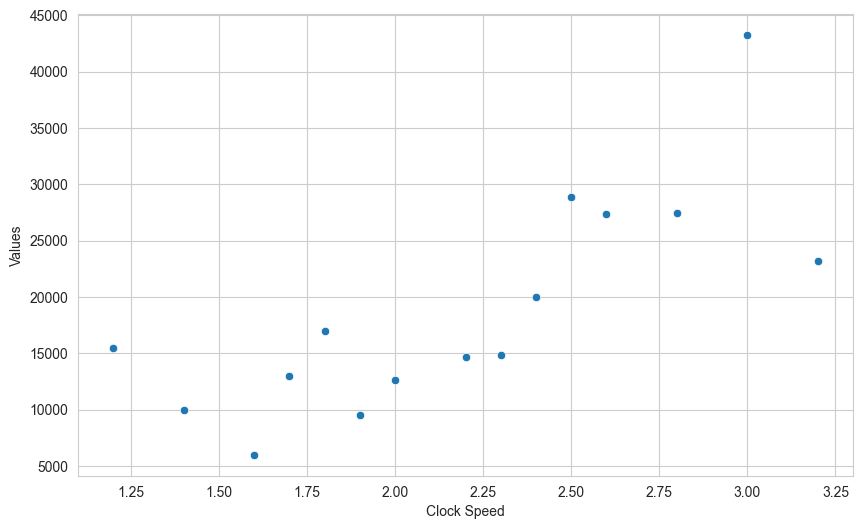

In [70]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.scatterplot(data=clock, x='Primary Clock Speed',y='price')
plt.xlabel('Clock Speed')
plt.ylabel('Values')
#Strong correlation between core and prices

In [71]:
#Lets start with machine learning!

In [72]:
df['battery'] = df['battery'].astype('int')

In [73]:
df['network'] = df['network'].str.replace('G','').astype('int')

In [74]:
li = df.select_dtypes('object')

In [75]:
li

,model_names,Operating System,Processor Core
0,"REDMI 10 Power (Sporty Orange, 128 GB)",Android 13,Octa Core
1,"REDMI 10 Power (Power Black, 128 GB)",Android 13,Octa Core
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",Android Q 10,Octa Core
3,"Redmi 9A Sport (Coral Green, 32 GB)",Android Q 10,Octa Core
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",Android 11,Octa Core
...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)",Android Lollipop 5.1,Hexa Core
544,"Redmi Note 3 (Gold, 32 GB)",Android Pie 9,Octa Core
545,"Redmi Note 8 (Moonlight White, 32 GB)",Android Nougat 11,Octa Core
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",Android Nougat 7.1.2,Octa Core


In [76]:
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

In [77]:
for x in range(len(df['model_names'])):
    df['model_names'].iloc[x] = x

C:\Users\MeCra\AppData\Local\Temp\ipykernel_3560\3213053933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_names'].iloc[x] = x
C:\Users\MeCra\AppData\Local\Temp\ipykernel_3560\3213053933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_names'].iloc[x] = x
C:\Users\MeCra\AppData\Local\Temp\ipykernel_3560\3213053933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_names'].iloc[x] = x
C:\Users\MeCr

In [78]:
df

,model_names,ratings,price,storage_ram,network,battery,storage,Operating System,Processor Core,Primary Clock Speed
0,0,4.2,13500,8,4,6000,128,Android 13,Octa Core,2.4
1,1,4.2,12840,8,4,6000,128,Android 13,Octa Core,2.4
2,2,4.1,7520,2,4,5000,32,Android Q 10,Octa Core,2.0
3,3,4.2,8450,3,4,5000,32,Android Q 10,Octa Core,2.0
4,4,4.2,21644,6,5,4250,128,Android 11,Octa Core,2.4
...,...,...,...,...,...,...,...,...,...,...
508,508,4.5,26999,3,3,4050,128,Android Lollipop 5.1,Hexa Core,1.8
509,509,4.1,8999,3,4,4000,32,Android Pie 9,Octa Core,2.0
510,510,4.3,11990,6,4,4520,32,Android Nougat 11,Octa Core,3.2
511,511,4.3,24999,4,3,4000,128,Android Nougat 7.1.2,Octa Core,1.8


In [79]:
sys = df['Operating System'].unique()

In [80]:
i = 0
for x in sys:
    df['Operating System'] = df['Operating System'].replace(x,i)
    i += 1

In [81]:
i = 0
for x in df['Processor Core'].unique():
    df['Processor Core'] = df['Processor Core'].replace(x,i)
    i += 1

In [82]:
df

,model_names,ratings,price,storage_ram,network,battery,storage,Operating System,Processor Core,Primary Clock Speed
0,0,4.2,13500,8,4,6000,128,0,0,2.4
1,1,4.2,12840,8,4,6000,128,0,0,2.4
2,2,4.1,7520,2,4,5000,32,1,0,2.0
3,3,4.2,8450,3,4,5000,32,1,0,2.0
4,4,4.2,21644,6,5,4250,128,2,0,2.4
...,...,...,...,...,...,...,...,...,...,...
508,508,4.5,26999,3,3,4050,128,36,3,1.8
509,509,4.1,8999,3,4,4000,32,6,0,2.0
510,510,4.3,11990,6,4,4520,32,37,0,3.2
511,511,4.3,24999,4,3,4000,128,9,0,1.8


<Axes: >

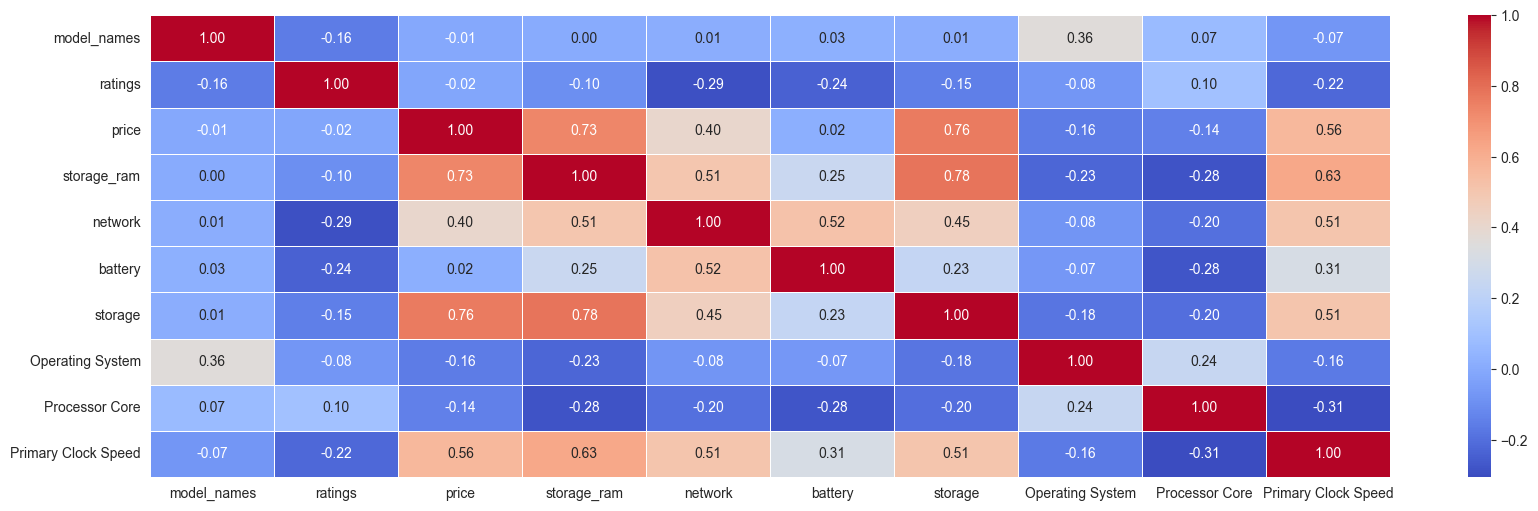

In [83]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
#Storage ram, network, storage, primary clock speed have the highest correlation with price

In [84]:
df

,model_names,ratings,price,storage_ram,network,battery,storage,Operating System,Processor Core,Primary Clock Speed
0,0,4.2,13500,8,4,6000,128,0,0,2.4
1,1,4.2,12840,8,4,6000,128,0,0,2.4
2,2,4.1,7520,2,4,5000,32,1,0,2.0
3,3,4.2,8450,3,4,5000,32,1,0,2.0
4,4,4.2,21644,6,5,4250,128,2,0,2.4
...,...,...,...,...,...,...,...,...,...,...
508,508,4.5,26999,3,3,4050,128,36,3,1.8
509,509,4.1,8999,3,4,4000,32,6,0,2.0
510,510,4.3,11990,6,4,4520,32,37,0,3.2
511,511,4.3,24999,4,3,4000,128,9,0,1.8


In [85]:
corr = dict(df.corrwith(df['price']))
corr

{'model_names': -0.005554578298945949,
 'ratings': -0.019138910549484755,
 'price': 0.9999999999999998,
 'storage_ram': 0.7307723370215768,
 'network': 0.4041838675591446,
 'battery': 0.01869017879720375,
 'storage': 0.7635355050715994,
 'Operating System': -0.1585081198365253,
 'Processor Core': -0.14286948742707928,
 'Primary Clock Speed': 0.5633708530888702}

In [86]:
droppin = {k: v for k, v in corr.items() if v <= 0.39}

In [87]:
droppin.keys()

dict_keys(['model_names', 'ratings', 'battery', 'Operating System', 'Processor Core'])

In [88]:
df.drop(columns=droppin.keys(), inplace=True)

In [89]:
df

,price,storage_ram,network,storage,Primary Clock Speed
0,13500,8,4,128,2.4
1,12840,8,4,128,2.4
2,7520,2,4,32,2.0
3,8450,3,4,32,2.0
4,21644,6,5,128,2.4
...,...,...,...,...,...
508,26999,3,3,128,1.8
509,8999,3,4,32,2.0
510,11990,6,4,32,3.2
511,24999,4,3,128,1.8


In [91]:
X = df.drop(columns='price')
y = df['price']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 320 to 102
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   storage_ram          410 non-null    int32  
 1   network              410 non-null    int32  
 2   storage              410 non-null    int32  
 3   Primary Clock Speed  410 non-null    float64
dtypes: float64(1), int32(3)
memory usage: 11.2 KB


In [93]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
gbm_param_grid = { 'colsample_bytree': [0.3, 0.7], 'n_estimators': np.arange(25,50,5), 'max_depth': [2, 5], 'learning_rate':np.arange(0.1,0.6,0.05)}
gbm = xgb.XGBRegressor(n_estimators=25)
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X_train,y_train)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
best_model = grid_mse.best_estimator_

Fitting 4 folds for each of 200 candidates, totalling 800 fits


C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: Fut

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: Fut

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: Fut

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: Fut

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: Fut

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: Fut

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 45}
Lowest RMSE found:  4692.911583232256


C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Me

In [94]:
best_model.score(X_test, y_test)

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


0.790675438912352

In [95]:
best_model.predict(X_test)

C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\MeCra\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


array([14422.599 , 30578.502 , 16888.84  , 10390.819 , 19907.674 ,
       14422.599 , 16686.232 , 31711.078 , 28735.098 , 10339.946 ,
       17076.744 , 12297.237 , 24764.459 ,  8893.162 ,  8917.523 ,
       10339.946 , 15828.377 , 10438.972 ,  8917.523 , 11083.349 ,
       11541.245 , 21766.5   , 19723.979 , 31328.459 , 11854.282 ,
       11541.245 , 15670.823 , 13333.814 ,  6031.34  , 20755.816 ,
       11083.349 , 10339.946 , 19374.432 , 12297.237 ,  6920.342 ,
       13865.496 , 13109.505 , 31711.078 , 15119.454 , 11541.245 ,
       17076.744 , 10390.819 ,  6685.7188,  7232.6387,  8893.162 ,
       13634.243 , 15828.377 , 13363.666 , 18017.34  , 15012.359 ,
       31711.078 , 31328.459 , 23900.37  , 23900.37  , 33415.273 ,
        6920.342 ,  7232.6387, 14422.599 , 13109.505 , 28605.934 ,
       11083.349 , 10339.946 , 16574.283 , 18224.    , 26249.547 ,
       17076.744 , 15012.359 , 12297.237 , 19723.979 , 18932.324 ,
       10438.972 , 17076.744 , 16574.283 , 23900.37  , 23900.3

In [96]:
print("Best parameters:", grid_mse.best_params_)
print("Best score:", grid_mse.best_score_)

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 45}
Best score: -22023419.12803548
